In [1]:
import random
import networkx as nx

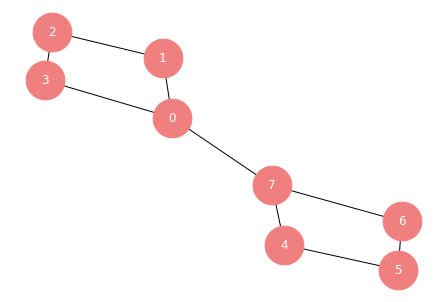

In [3]:
# 1. Partitions
G = nx.Graph()
nx.add_cycle(G, [0, 1, 2, 3])
nx.add_cycle(G, [4, 5, 6, 7])
G.add_edge(0, 7)

nx.draw(G, with_labels=True, node_color = 'LightCoral', node_size = 1500, font_color ='white' )

In [4]:
parts = [
    {1, 2, 3},
    {4, 5, 6},
    {0, 7},
]

In [5]:
nx.community.is_partition(G, parts)


True

In [7]:
parts_map = {}
for idx, cluster_nodes in enumerate(parts):
    for n in cluster_nodes:
        parts_map[n] = idx

parts_map

{1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 0: 2, 7: 2}

In [8]:
parts_map[0] == parts_map[7]


True

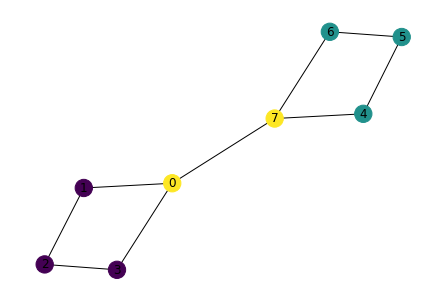

In [9]:
node_colors = [parts_map[n] for n in G.nodes]
        
nx.draw(G, node_color=node_colors, with_labels=True)

In [11]:
# 2. Modularity
def modularity(G, partition):
    W = sum(G.edges[v, w].get('weight', 1) for v, w in G.edges)
    summation = 0
    for cluster_nodes in partition:
        s_c = sum(G.degree(n, weight='weight') for n in cluster_nodes)
        C = G.subgraph(cluster_nodes)
        W_c = sum(C.edges[v, w].get('weight', 1) for v, w in C.edges)
        summation += W_c - s_c ** 2 / (4 * W)
    
    return summation / W
modularity(G, parts)


0.2222222222222222

In [12]:
part_2 = [
    {0, 1, 2, 3},
    {4, 5, 6, 7},
]
modularity(G, part_2)

0.3888888888888889

In [13]:
nx.community.quality.modularity(G, part_2 )

0.38888888888888884

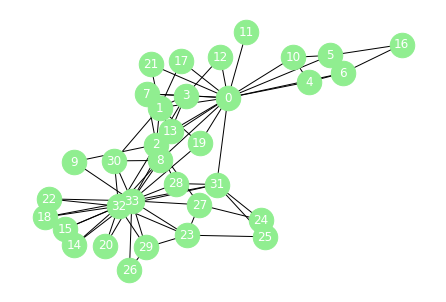

In [19]:
# 3. Zachary's Karate Club
K = nx.karate_club_graph()
nx.draw(K, with_labels=True, node_color = 'LightGreen', node_size = 600, font_color ='white' )

In [20]:
K.nodes[0]


{'club': 'Mr. Hi'}

In [22]:
K.nodes[9]


{'club': 'Officer'}

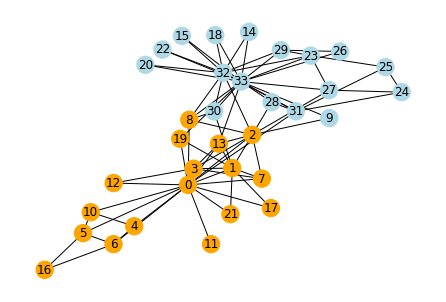

In [24]:
K = nx.karate_club_graph()
club_color = {
    'Mr. Hi': 'orange',
    'Officer': 'lightblue',
}
node_colors = [club_color[K.nodes[n]['club']] for n in K.nodes]
nx.draw(K, node_color=node_colors, with_labels=True)

In [26]:
groups = {
    'Mr. Hi': set(),
    'Officer': set(),
}

for n in K.nodes:
    club = K.nodes[n]['club']
    groups[club].add(n)
    
groups

{'Mr. Hi': {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21},
 'Officer': {9,
  14,
  15,
  18,
  20,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33}}

In [28]:
empirical_partition = list(groups.values())
empirical_partition

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21},
 {9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]

In [29]:
nx.community.is_partition(K, empirical_partition)


True

In [30]:
nx.community.quality.modularity(K, empirical_partition)


0.3582347140039448

In [31]:
# Comparison to a random partition


In [32]:
random_nodes = random.sample(K.nodes, 17)
random_part = [set(random_nodes),
                    set(K.nodes) - set(random_nodes)]
random_part

C:\Users\Momo\AppData\Local\Temp/ipykernel_9460/36662844.py:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nodes = random.sample(K.nodes, 17)


[{0, 3, 4, 5, 6, 8, 11, 12, 13, 14, 20, 21, 24, 28, 29, 32, 33},
 {1, 2, 7, 9, 10, 15, 16, 17, 18, 19, 22, 23, 25, 26, 27, 30, 31}]

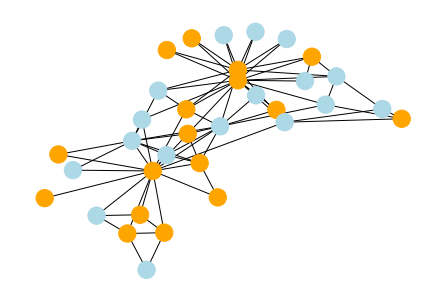

In [33]:
random_node_colors = ['orange' if n in random_nodes else 'lightblue' for n in K.nodes]
nx.draw(K, node_color=random_node_colors)

In [34]:
nx.community.quality.modularity(K, random_part)


-0.06517094017094019

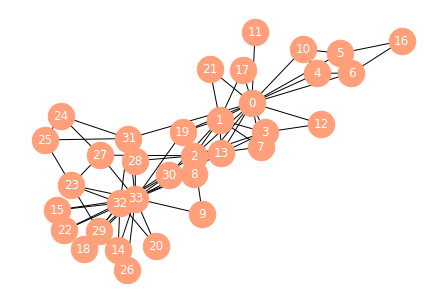

In [36]:
# 4. Girvan-Newman clustering
G = nx.karate_club_graph()
nx.draw(G, with_labels=True, node_color = 'LightSalmon', node_size = 700, font_color ='white' )

In [37]:
# 4.1 Create a partition sequence
# A. Calculate the betweenness centrality for all links
nx.edge_betweenness_centrality(G)


{(0, 1): 0.025252525252525245,
 (0, 2): 0.0777876807288572,
 (0, 3): 0.02049910873440285,
 (0, 4): 0.0522875816993464,
 (0, 5): 0.07813428401663694,
 (0, 6): 0.07813428401663695,
 (0, 7): 0.0228206434088787,
 (0, 8): 0.07423959482783014,
 (0, 10): 0.0522875816993464,
 (0, 11): 0.058823529411764705,
 (0, 12): 0.04652406417112298,
 (0, 13): 0.04237189825425121,
 (0, 17): 0.04012392835922248,
 (0, 19): 0.045936960642843,
 (0, 21): 0.040123928359222474,
 (0, 31): 0.1272599949070537,
 (1, 2): 0.023232323232323233,
 (1, 3): 0.0077243018419489,
 (1, 7): 0.007422969187675069,
 (1, 13): 0.01240556828792123,
 (1, 17): 0.01869960105254222,
 (1, 19): 0.014633732280791102,
 (1, 21): 0.01869960105254222,
 (1, 30): 0.032280791104320514,
 (2, 3): 0.022430184194890075,
 (2, 7): 0.025214328155504617,
 (2, 8): 0.009175791528732704,
 (2, 9): 0.030803836686189627,
 (2, 13): 0.007630931160342923,
 (2, 27): 0.04119203236850296,
 (2, 28): 0.02278244631185807,
 (2, 32): 0.06898678663384543,
 (3, 7): 0.00336558

In [38]:
my_edge_between = nx.edge_betweenness_centrality(G)
my_edge_between[0, 1]

0.025252525252525245

In [39]:
my_edge_between.get((0, 1))


0.025252525252525245

In [40]:
# B. Remove the link with largest betweenness...
max(my_edge_between, key=my_edge_between.get)


(0, 31)

In [41]:
max(G.edges(), key=my_edge_between.get)

(0, 31)

In [42]:
my_edge_between = nx.edge_betweenness_centrality(G)
most_valuable_edge = max(G.edges(), key=my_edge_between.get)
G.remove_edge(*most_valuable_edge)

In [43]:
nx.connected_components(G)


<generator object connected_components at 0x0000020AB11BDE40>

In [44]:
list(nx.connected_components(G))


[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33}]

In [45]:
# C. Recalculate the betweenness centrality of the links of the resulting graph.
# D. Repeat from step B until no links remain.
G = nx.karate_club_graph()
part_seq = []
for _ in range(G.number_of_edges()):
    my_edge_between = nx.edge_betweenness_centrality(G)
    most_valuable_edge = max(G.edges(), key=my_edge_between.get)
    G.remove_edge(*most_valuable_edge)
    my_part = list(nx.connected_components(G))
    part_seq.append(my_part)

In [46]:
len(part_seq), nx.karate_club_graph().number_of_edges()


(78, 78)

In [47]:
len(part_seq[0])


1

In [48]:
len(part_seq[-1]), nx.karate_club_graph().number_of_nodes()


(34, 34)

In [49]:
# 4.2 Evaluate the modularity of each partition in the sequence
G = nx.karate_club_graph()
modul_seq = [modularity(G, p) for p in part_seq]
modul_seq

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.35996055226824464,
 0.35996055226824464,
 0.35996055226824464,
 0.348783694937541,
 0.348783694937541,
 0.348783694937541,
 0.348783694937541,
 0.3632478632478632,
 0.3632478632478632,
 0.3632478632478632,
 0.3632478632478632,
 0.3632478632478632,
 0.3632478632478632,
 0.4012984878369493,
 0.3925049309664694,
 0.3925049309664694,
 0.376232741617357,
 0.376232741617357,
 0.35831689677843515,
 0.35831689677843515,
 0.34171597633136086,
 0.34171597633136086,
 0.3247863247863247,
 0.3247863247863247,
 0.3159105851413542,
 0.3159105851413542,
 0.2986522024983562,
 0.2986522024983562,
 0.28040762656147256,
 0.28040762656147256,
 0.26282051282051266,
 0.26282051282051266,
 0.24753451676528584,
 0.24753451676528584,
 0.22682445759368833,
 0.22682445759368833,
 0.20890861275476658,
 0.20890861275476658,
 0.1898422090729783,
 0.18129520052596976,
 0.18129520052596976,
 0.18129520052596976,
 0.1600920447074293,
 0.1600920447074293,
 0

Text(0.5, 0, 'Algorithm step')

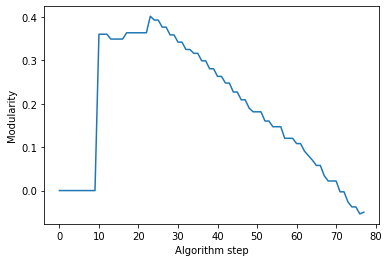

In [50]:
import matplotlib.pyplot as plt
plt.plot(modul_seq)
plt.ylabel('Modularity')
plt.xlabel('Algorithm step')

In [52]:
# Get the partition with highest modularity
def my_modularity(partition):
    return nx.community.quality.modularity(G, partition)
best_part = max(part_seq, key=my_modularity)
best_part

[{0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
 {2, 24, 25, 27, 28, 31},
 {4, 5, 6, 10, 16},
 {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
 {9}]

In [53]:
def create_partition_map(partition):
    part_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for n in cluster_nodes:
            part_map[n] = idx
    return part_map


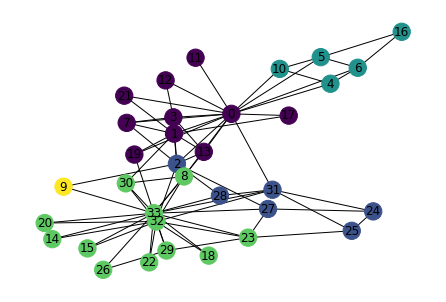

In [55]:
best_part_map = create_partition_map(best_part)

node_colors = [best_part_map[n] for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors)

In [56]:
nx.community.quality.modularity(G, best_part)


0.40129848783694944

In [57]:
for part in part_seq:
    if len(part) == 2:
        two_cluster_partition = part
        break

two_cluster_partition

[{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]

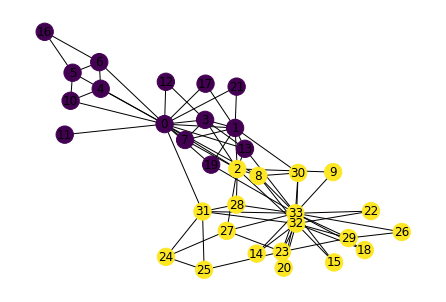

In [58]:
two_cluster_part_map = create_partition_map(two_cluster_partition)

node_colors = [two_cluster_part_map[n] for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors)

In [59]:
nx.community.quality.modularity(G, two_cluster_partition)


0.3599605522682445

Text(0.5, 1.0, 'Actual communities')

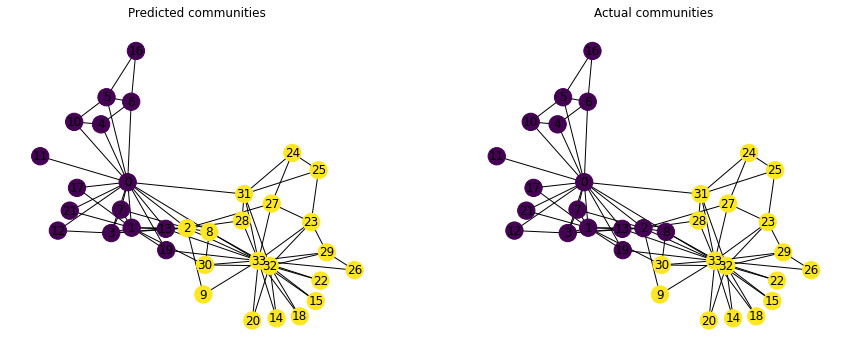

In [60]:
import matplotlib.pyplot as plt

pos = nx.layout.spring_layout(G)
fig = plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
two_cluster_partition_map = create_partition_map(two_cluster_partition)
node_colors = [two_cluster_partition_map[n] for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors, pos=pos)
plt.title('Predicted communities')

plt.subplot(1, 2, 2)
node_colors = [G.nodes[n]['club'] == 'Officer' for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors, pos=pos)
plt.title('Actual communities')

In [61]:
# NetworkX Function 
list(nx.community.girvan_newman(G))[:5]

[({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
  {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}),
 ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
  {2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
  {9}),
 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
  {2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
  {4, 5, 6, 10, 16},
  {9}),
 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
  {2, 24, 25, 27, 28, 31},
  {4, 5, 6, 10, 16},
  {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
  {9}),
 ({0, 1, 3, 7, 12, 13, 17, 19, 21},
  {2, 24, 25, 27, 28, 31},
  {4, 5, 6, 10, 16},
  {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
  {9},
  {11})]